   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  
   carat  cut  color  clarity
0   0.23    2      1        3
1   0.21    3      1        2
2   0.23    1      1        4
3   0.29    3      5        5
4   0.31    1      6        3


C:\Users\33629\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\33629\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\33629\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\33629\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

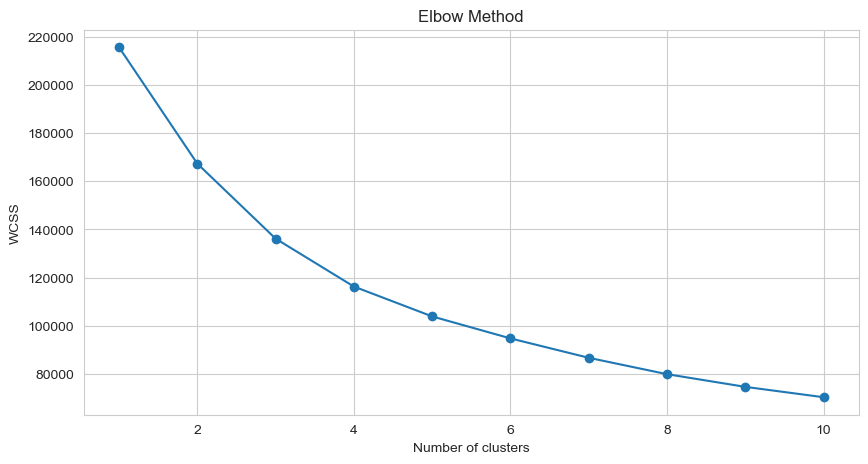

C:\Users\33629\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


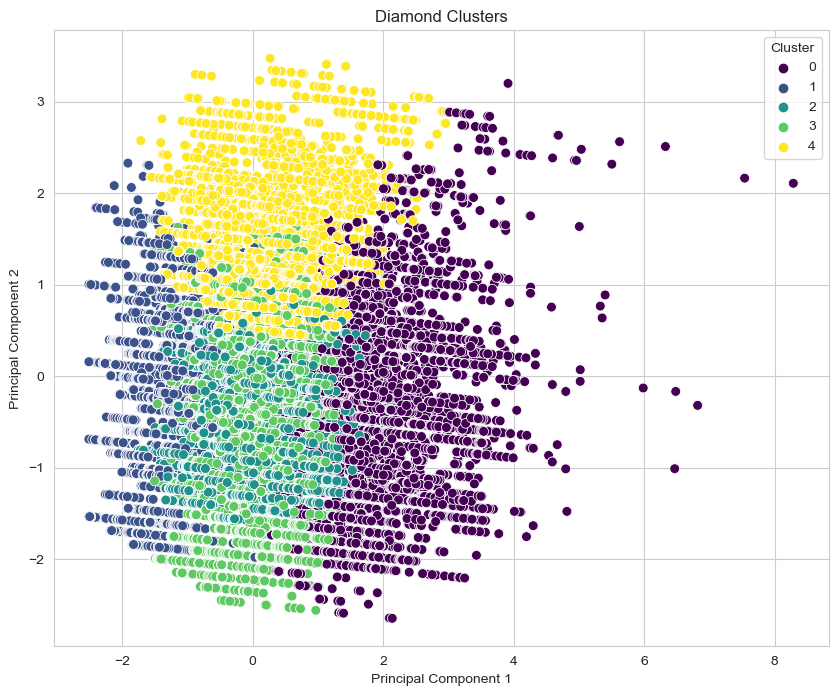

            carat       cut     color   clarity
cluster                                        
0        1.515796  2.694383  4.327432  3.230161
1        0.513047  2.416442  1.065823  5.472582
2        0.759975  3.590948  1.822504  2.819966
3        0.564100  2.516617  3.886817  5.337611
4        0.728305  1.490505  2.150118  2.377193


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import pickle

# Load the data
file_path = "D:\\Bureau\\ESILV\\S6\\diamonds.csv"
diamonds = pd.read_csv(file_path)

# Display the first five rows
print(diamonds.head())

# Select relevant features
diamonds = diamonds[['carat', 'cut', 'color', 'clarity']]

# Encode categorical features
encoder = LabelEncoder()
diamonds['cut'] = encoder.fit_transform(diamonds['cut'])
diamonds['color'] = encoder.fit_transform(diamonds['color'])
diamonds['clarity'] = encoder.fit_transform(diamonds['clarity'])

# Display the first five rows after encoding
print(diamonds.head())

# Normalize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(diamonds)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=300, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Build the K-Means model with the optimal number of clusters (e.g., 5)
optimal_clusters = 5  # To be determined with the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, max_iter=600, random_state=42)
kmeans.fit(features_scaled)
diamonds['cluster'] = kmeans.labels_

# Use PCA to reduce dimensions and visualize clusters
pca = PCA(2)
features_pca = pca.fit_transform(features_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=diamonds['cluster'], palette='viridis', s=50)
plt.title('Diamond Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Examine the mean characteristics of each cluster
cluster_means = diamonds.groupby('cluster').mean()
print(cluster_means)